In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


def zhang_suen_thinning(image):
    def thinning_iteration(im, iter):
        marker = np.zeros_like(im)
        for i in range(1, im.shape[0]-1):
            for j in range(1, im.shape[1]-1):
                p2 = im[i-1, j]
                p3 = im[i-1, j+1]
                p4 = im[i, j+1]
                p5 = im[i+1, j+1]
                p6 = im[i+1, j]
                p7 = im[i+1, j-1]
                p8 = im[i, j-1]
                p9 = im[i-1, j-1]
                A  = (p2 == 0 and p3 == 1) + (p3 == 0 and p4 == 1) + \
                     (p4 == 0 and p5 == 1) + (p5 == 0 and p6 == 1) + \
                     (p6 == 0 and p7 == 1) + (p7 == 0 and p8 == 1) + \
                     (p8 == 0 and p9 == 1) + (p9 == 0 and p2 == 1)
                B  = p2 + p3 + p4 + p5 + p6 + p7 + p8 + p9
                m1 = (p2 * p4 * p6) if iter == 0 else (p2 * p4 * p8)
                m2 = (p4 * p6 * p8) if iter == 0 else (p2 * p6 * p8)
                if A == 1 and B >= 2 and B <= 6 and m1 == 0 and m2 == 0:
                    marker[i, j] = 1
        return im & ~marker

    image = image // 255
    prev = np.zeros_like(image)
    diff = None

    while True:
        image = thinning_iteration(image, 0)
        image = thinning_iteration(image, 1)
        diff = np.sum(np.abs(image - prev))
        prev = image.copy()
        if diff == 0:
            break

    return image * 255

#

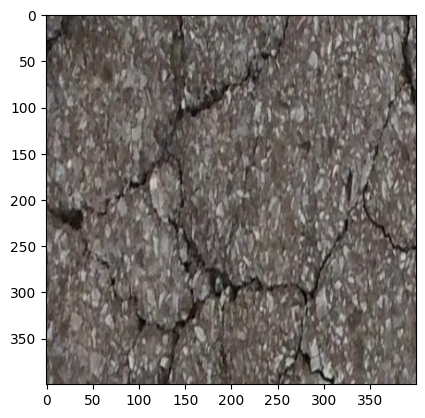

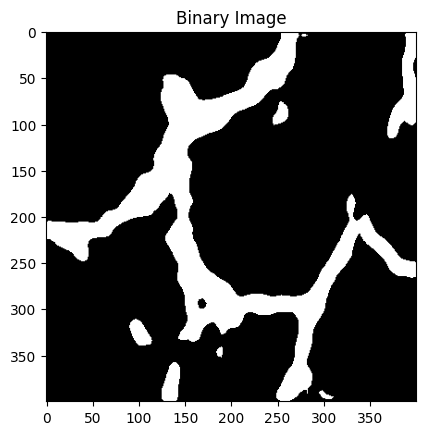

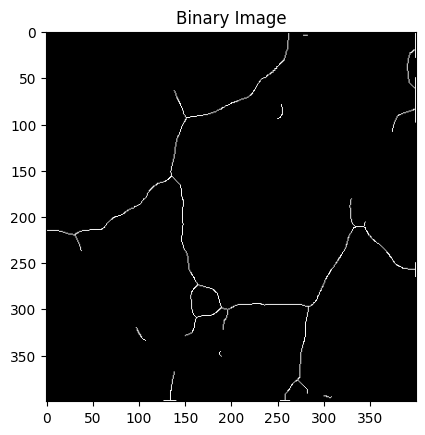

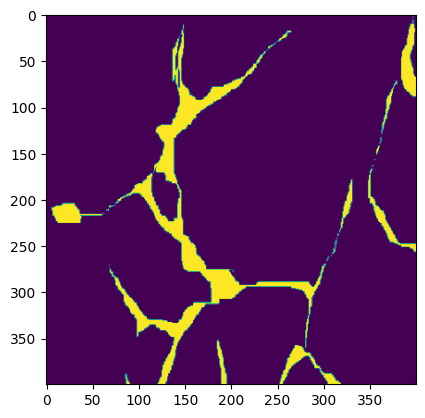

NameError: name 'mask' is not defined

In [6]:
#  Read image


def smooth_img(img):
    # Apply Gaussian Blur
    blurred = cv2.GaussianBlur(mask, (5, 5), 0)

    # Re-apply threshold
    _, smoothed_mask = cv2.threshold(blurred, 127, 255, cv2.THRESH_BINARY)
    return smoothed_mask



def show_thining(input_image):
    if input_image is None:
        raise ValueError("Image not found or path is incorrect")
    # Convert to binary
    _, binary_image = cv2.threshold(input_image, 0, 255, cv2.THRESH_BINARY)
    # for i in range(len(binary_image)):
    #     print("")
    #     for j in binary_image[i]:
    #         print(binary_image[i][j],end='')
    plt.imshow(binary_image, cmap='gray')
    plt.title('Binary Image')
    plt.show()
    # # # Apply thinning
    thinned_image = cv2.ximgproc.thinning(binary_image)

    plt.imshow(thinned_image, cmap='gray')
    plt.title('Binary Image')
    plt.show()
# # Save or display the result
# # cv2.imwrite('thinned_image.png', thinned_image)
# cv2.imshow(thinned_image)


raw_path = '/home/iix5sgh/workspace/crack/dataset/Final_Dataset/Images/CRACK500_20160222_163940_1_1.png'
mask_path = '/home/iix5sgh/workspace/crack/dataset/Final_Dataset/Infer/CRACK500_20160222_163940_1_1.png'
gt_mask_path = '/home/iix5sgh/workspace/crack/dataset/Final_Dataset/Masks/CRACK500_20160222_163940_1_1.png'

input_image = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
raw_image = cv2.imread(raw_path)
gt_image = cv2.imread(gt_mask_path, cv2.IMREAD_GRAYSCALE)

# input_image = cv2.imread('/home/iix5sgh/workspace/crack/dataset/Final_Dataset/Infer/CRACK500_20160222_080850_641_361.png', cv2.IMREAD_GRAYSCALE)
# input_image2 = cv2.imread('/home/iix5sgh/workspace/crack/dataset/Final_Dataset/Masks/CRACK500_20160222_080850_641_361.png', cv2.IMREAD_GRAYSCALE)


# input_image = cv2.imread('/home/iix5sgh/workspace/crack/dataset/Final_Dataset/Infer/Rissbilder_for_Florian_9S6A2798_1187_2443_2573_2349.png', cv2.IMREAD_GRAYSCALE)
# input_image2 = cv2.imread('/home/iix5sgh/workspace/crack/dataset/Final_Dataset/Masks/Rissbilder_for_Florian_9S6A2798_1187_2443_2573_2349.png', cv2.IMREAD_GRAYSCALE)

# raw_image = cv2.imread('/home/iix5sgh/workspace/crack/dataset/Final_Dataset/Images/Rissbilder_for_Florian_9S6A2798_1187_2443_2573_2349.png')
plt.imshow(raw_image)
plt.show()
show_thining(input_image)
plt.imshow(gt_image)
plt.show()
show_thining(smooth_img(gt_image))



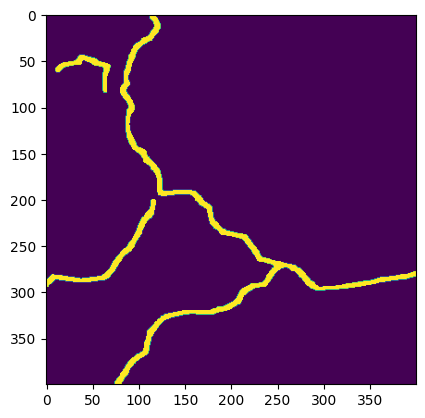

In [3]:
# Load the binary mask
mask = cv2.imread('/home/iix5sgh/workspace/crack/dataset/Final_Dataset/Masks/Rissbilder_for_Florian_9S6A2798_1187_2443_2573_2349.png', 0)  # 0 for grayscale





# plt.imshow(smoothed_mask)
# plt.show()